**Programming Assignment 2 - LINEAR REGRESSION**

Ma. Charina O. Gavica <br>
Ma. Cristina F. Jara <br>
Khryzelle Trisha L. Suyat

EMTECH-BATCHSAWA



**DATASET INITIALIZATION**


In [1]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sns.set_theme(style="whitegrid")


Retrieving the dataset with ID 242 from the UCI Machine Learning Repository, as accessed via their API on the website.

**DATA EXPLORATION**

In this section, we conduct exploratory data analysis (EDA) to uncover initial patterns, relationships, and trends within the dataset. This process helps us understand the structure of the data, identify potential anomalies, and highlight key features that may influence our analysis or modeling. Let's take a closer look at the dataset to gain valuable insights.

In [15]:
print(f"Length: {len(energy_efficiency.data.features)}")
print(f"Dimensions: ({energy_efficiency.variables.shape[0]}, {len(energy_efficiency.data.features)})")
print(f"Missing: {energy_efficiency.variables.missing_values.isna().sum()}")
print(f"Features: {(energy_efficiency.variables.role == 'Feature').sum()}")
print(f"Labels: {(energy_efficiency.variables.role == 'Target').sum()}")

variables = list(energy_efficiency.variables.description)
types = list(energy_efficiency.variables.type)

energy_efficiency.variables[['name', 'role' ,'type' , 'description']]


Length: 768
Dimensions: (10, 768)
Missing: 0
Features: 8
Labels: 2


,name,role,type,description
0,X1,Feature,Continuous,Relative Compactness
1,X2,Feature,Continuous,Surface Area
2,X3,Feature,Continuous,Wall Area
3,X4,Feature,Continuous,Roof Area
4,X5,Feature,Continuous,Overall Height
5,X6,Feature,Integer,Orientation
6,X7,Feature,Continuous,Glazing Area
7,X8,Feature,Integer,Glazing Area Distribution
8,Y1,Target,Continuous,Heating Load
9,Y2,Target,Continuous,Cooling Load


In [13]:
df = energy_efficiency.data.features.join(energy_efficiency.data.targets)


The dataset contains 768 records and 10 variables, with 8 feature variables and 2 label variables. It has no missing values, meaning all data points are fully populated. The dataset's dimensions are 768 rows by 10 columns, and the goal is to analyze the 8 features to predict the 2 labels, which are likely related to heating and cooling loads.

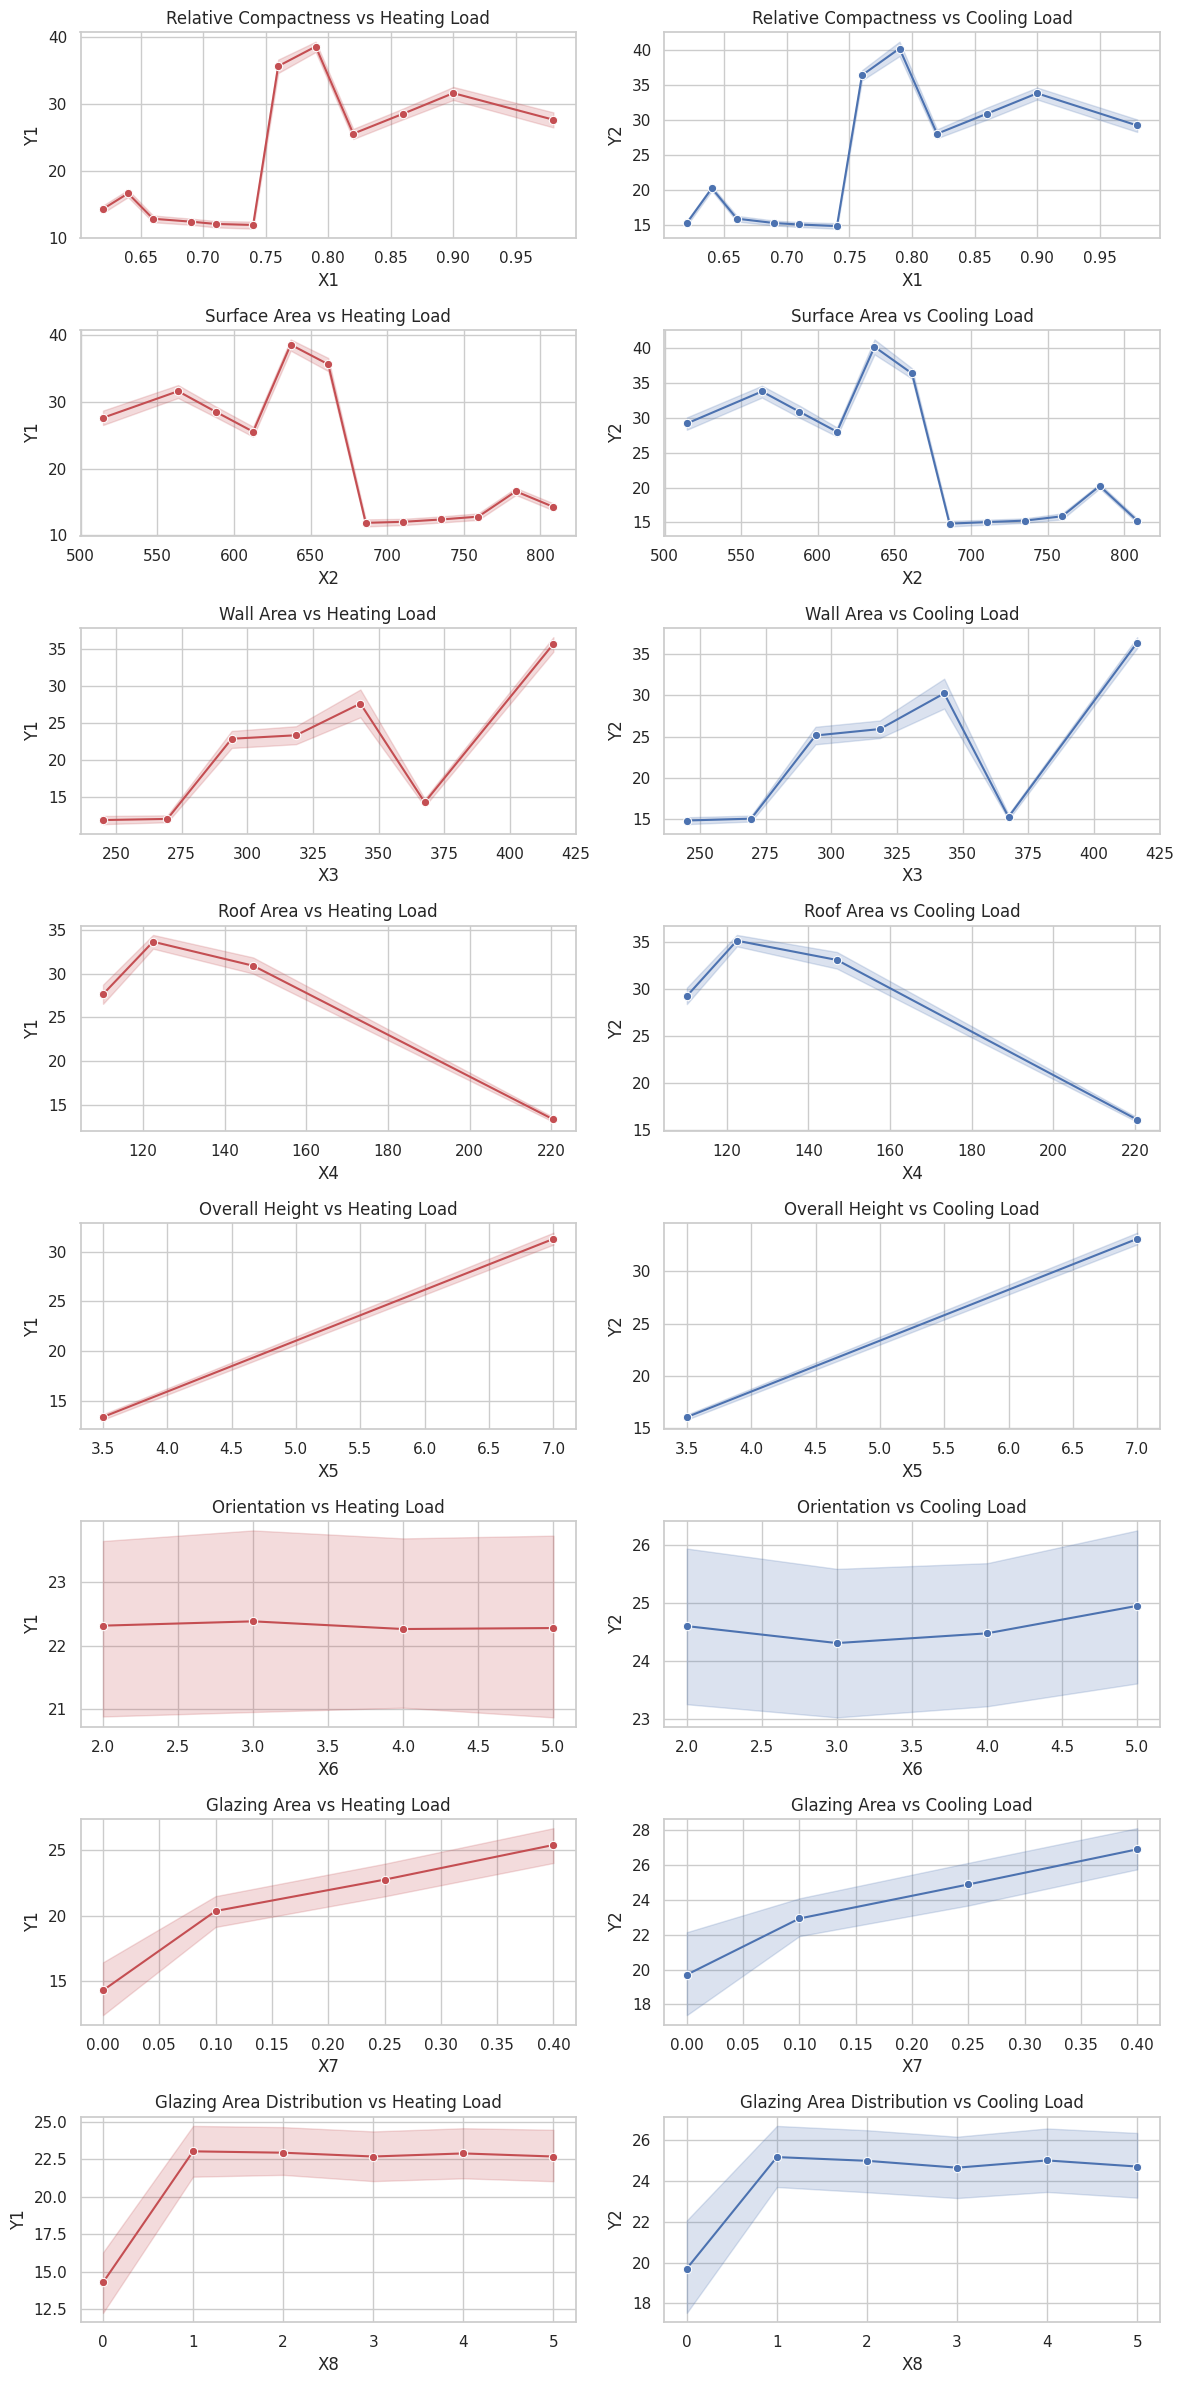

In [38]:
fig, axes = plt.subplots(8, 2, figsize=(12, 24))

for i, feature in enumerate(energy_efficiency.data.features.columns[:8]):
    feature_name = energy_efficiency.variables[energy_efficiency.variables.name == feature].description.iloc[0]

    sns.lineplot(data=df, x=feature, y='Y1', ax=axes[i, 0], marker='o', linestyle='-', color='r')
    axes[i, 0].set_title(f'{feature_name} vs Heating Load')

    sns.lineplot(data=df, x=feature, y='Y2', ax=axes[i, 1], marker='o', linestyle='-', color='b')
    axes[i, 1].set_title(f'{feature_name} vs Cooling Load')

plt.tight_layout()
plt.show()


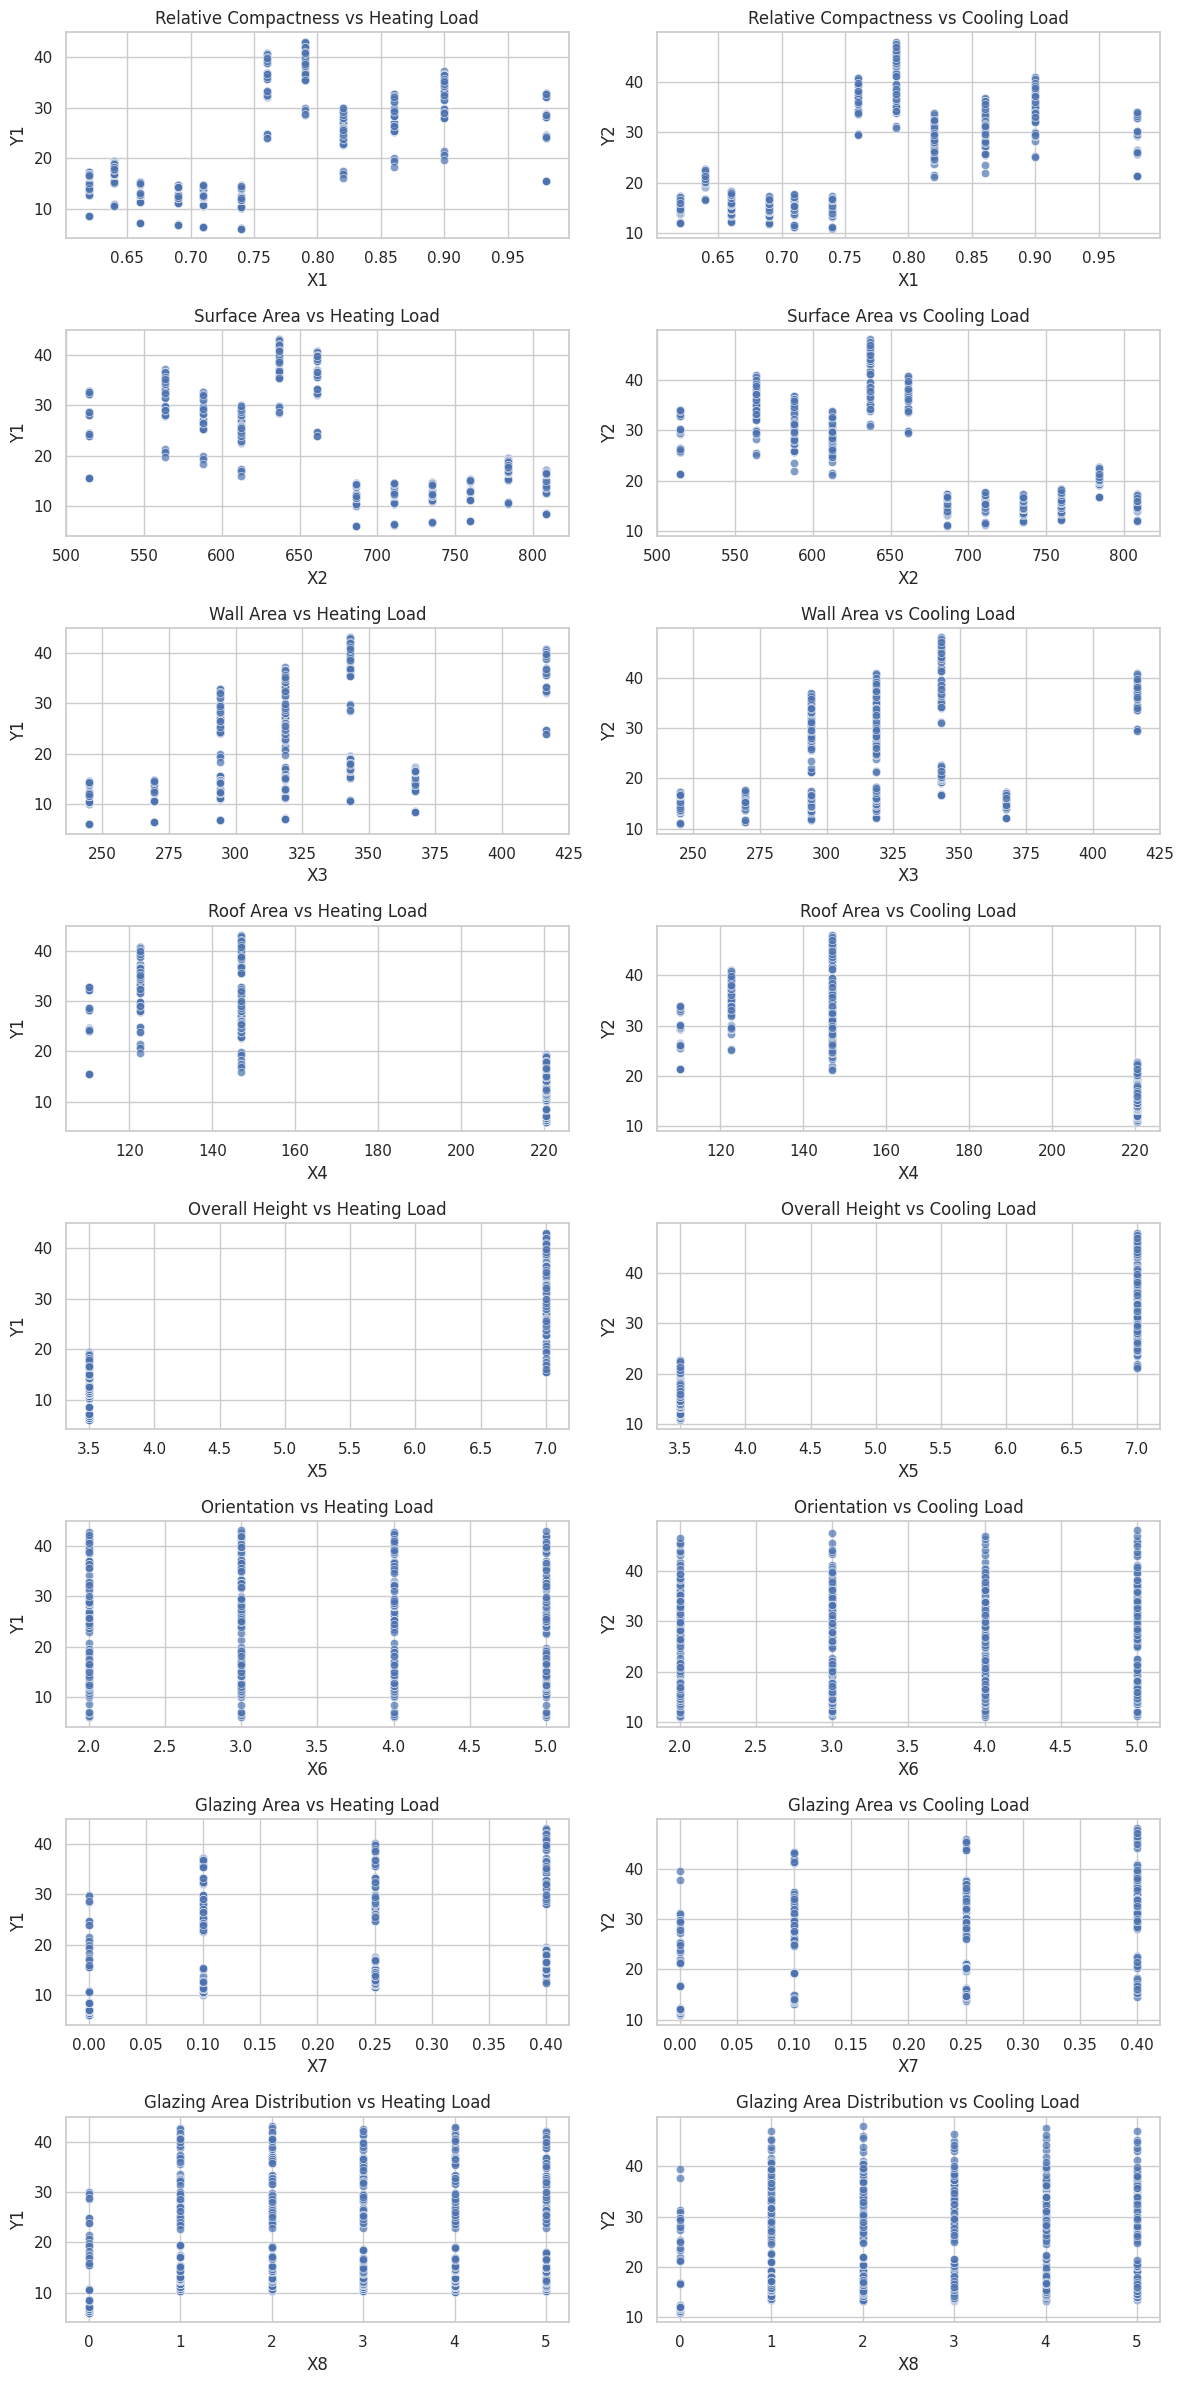

In [14]:
fig, axes = plt.subplots(8, 2, figsize=(12, 24))

for i, feature in enumerate(energy_efficiency.data.features.columns[:8]):
    feature_name = energy_efficiency.variables[energy_efficiency.variables.name == feature].description.iloc[0]


    sns.scatterplot(data=df, x=feature, y='Y1', ax=axes[i, 0], alpha=0.7)
    axes[i, 0].set_title(f'{feature_name} vs Heating Load')

    sns.scatterplot(data=df, x=feature, y='Y2', ax=axes[i, 1], alpha=0.7)
    axes[i, 1].set_title(f'{feature_name} vs Cooling Load')

plt.tight_layout()
plt.show()


**MODEL OPTIMIZATION**

During this training, the goal was to predict the heating load based on the provided features. We utilized multiple linear regression with ridge regularization. The primary objective was to identify the ideal alpha value for the ridge regression regularization.

**Training, Validation, and Testing Data Split**

The dataset was partitioned into three distinct subsets: 60% was allocated for training the model, 20% was reserved for testing its performance, and the remaining 20% was used for validation purposes.

In [19]:
from sklearn.model_selection import train_test_split

x = energy_efficiency.data.features
y = energy_efficiency.data.targets.Y1

# Split into 60% training and 40% testing, then further split testing into 50% validation and 50% test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=69)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=420)

# Output sizes of each dataset
print(f"Training size: {len(x_train)}")
print(f"Validation size: {len(x_val)}")
print(f"Test size: {len(y_test)}")


Training size: 460
Validation size: 154
Test size: 154


**Ridge Regression Regularization**

We selected 10 different ridge regularization values and calculated the corresponding accuracy for each on the validation set. A function was developed to apply ridge regularization to a given set of features.

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def ridge_lr(alpha, training_features=x_train, training_labels=y_train, test_features=x_val):
    """ Perform linear regression with ridge regularization. """
    model = Ridge(alpha=alpha).fit(training_features, training_labels)
    return model.predict(test_features), model

predictions, model = ridge_lr(1e-2, test_features=x_test)

def eval_lr(truth, predictions: list, names=[""]):
    """ Evaluate linear regression models with R2, MSE, RMSE, and NMSE. """
    results = pd.DataFrame({
        "r2": [r2_score(truth, p) for p in predictions],
        "mse": [mean_squared_error(truth, p) for p in predictions],
        "rmse": [np.sqrt(mean_squared_error(truth, p)) for p in predictions],
    }, index=names)
    results["nmse"] = results["mse"] / np.var(truth)
    return results


                r2        mse      rmse      nmse
0.0001    0.926392   7.484246  2.735735  0.073608
0.001     0.926373   7.486114  2.736076  0.073627
0.01      0.926113   7.512634  2.740919  0.073887
0.1       0.923998   7.727636  2.779863  0.076002
1.0       0.922025   7.928203  2.815707  0.077975
10.0      0.905132   9.645832  3.105774  0.094868
100.0     0.860443  14.189727  3.766925  0.139557
1000.0    0.828971  17.389706  4.170097  0.171029
10000.0   0.817970  18.508235  4.302120  0.182030
100000.0  0.812748  19.039209  4.363394  0.187252


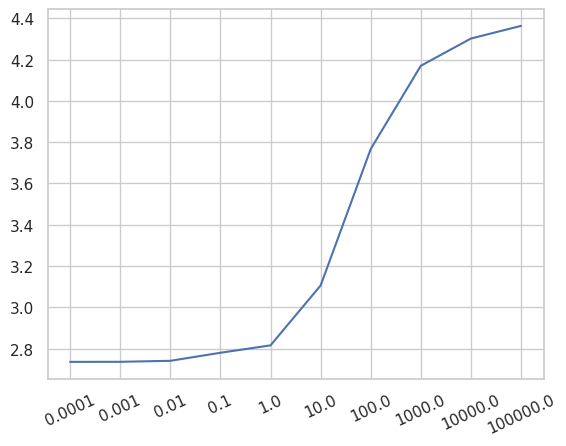

In [24]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]

predictions = [ridge_lr(alpha)[0] for alpha in alphas]

results = eval_lr(y_val, predictions, names=[str(alpha) for alpha in alphas])

print(results)
plt.xticks(rotation=25)
plt.plot(results["rmse"])
plt.show()


**Final Model Evaluation**

We assessed the optimal value for the ridge regularization hyperparameter and discovered that the best model achieved an alpha of 0.01, yielding an R² score of 0.920539.The results from the test set are similar to those from the validation set, suggesting that this is the optimal ridge regression model for our dataset.

In [26]:
predictions, _ = ridge_lr(1e-2, test_features=x_test)
print(eval_lr(y_test, [predictions]))


        r2       mse      rmse      nmse
  0.920539  8.166739  2.857751  0.079461


**Post-Training Assessment**

In [28]:
coefficients = np.argsort(np.abs(model.coef_))[::-1]
features = [f"X{i+1}: {round(model.coef_[i], 2)}" for i in coefficients]

print("\nModel parameters:")
print("\n".join(features))
print(f"Intercept: {round(model.intercept_, 2)}")



Model parameters:
X1: -47.5
X7: 20.51
X5: 4.68
X8: 0.34
X6: -0.1
X2: -0.04
X4: -0.04
X3: 0.04
Intercept: 50.36


We determined the coefficients and intercepts of the best model, along with the accuracies for the training, validation, and test sets.

In [30]:
test_features = [x_val, x_test]
test_labels = [y_val, y_test]
names = ['validation', 'test']

predictions = [ridge_lr(alpha=1e-2, test_features=feature)[0] for feature in test_features]

for prediction, test_label, name in zip(predictions, test_labels, names):
    print(eval_lr(test_label, [prediction], [name]))


                  r2       mse      rmse      nmse
validation  0.926113  7.512634  2.740919  0.073887
            r2       mse      rmse      nmse
test  0.920539  8.166739  2.857751  0.079461


**Best Features**

In [32]:
top_5 = np.argsort(np.abs(model.coef_))[::-1][:5]
features = [f"X{i+1}: {round(model.coef_[i], 2)}" for i in top_5]

print("\nTop 5 parameters:")
print("\n".join(features))



Top 5 parameters:
X1: -47.5
X7: 20.51
X5: 4.68
X8: 0.34
X6: -0.1


From this analysis, we identified the top 5 most important features of the linear regression model. These features are X1, X7, X5, X8, and X6, which are Relative Compactness, Glazing Area, Overall Height, Glazing Area Distribution, Orientation

**Feature Selection and Evaluation**

In [34]:
nx = energy_efficiency.data.features[top_5_names]
ny = energy_efficiency.data.targets.Y1

# Split data: 60% training, 40% testing, then 50% validation from the 40% testing
nx_train, nx_temp, ny_train, ny_temp = train_test_split(nx, ny, test_size=0.4, random_state=69)
nx_val, nx_test, ny_val, ny_test = train_test_split(nx_temp, ny_temp, test_size=0.5, random_state=420)

test_features = [nx_val, nx_test]


                r2         mse       rmse      nmse
0.0001    0.919049    8.230844   2.868945  0.080951
0.001     0.919045    8.231271   2.869019  0.080955
0.01      0.919002    8.235658   2.869784  0.080998
0.1       0.918470    8.289755   2.879193  0.081530
1.0       0.909559    9.195736   3.032447  0.090441
10.0      0.861265   14.106119   3.755811  0.138735
100.0     0.810652   19.252349   4.387750  0.189348
1000.0    0.656651   34.910589   5.908518  0.343349
10000.0   0.168574   84.536711   9.194385  0.831426
100000.0  0.003924  101.277857  10.063690  0.996076


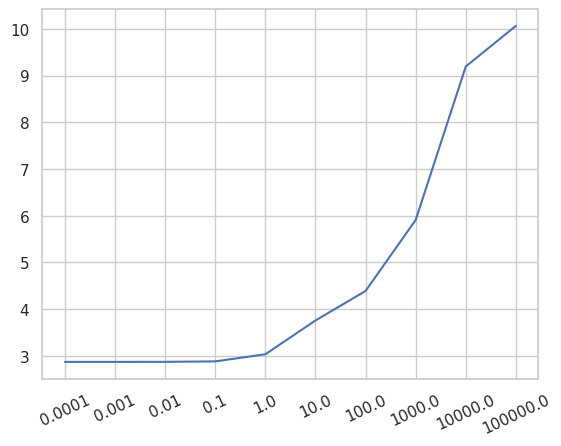

In [35]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
predictions = [ridge_lr(alpha, training_features=nx_train, training_labels=ny_train, test_features=nx_val)[0] for alpha in alphas]

results = eval_lr(ny_val, predictions, names=[str(alpha) for alpha in alphas])
print(results)

plt.xticks(rotation=25)
plt.plot(results["rmse"])
plt.show()


In [37]:
predictions = [ridge_lr(1e-4, training_features=nx_train, training_labels=ny_train, test_features=test_feature)[0] for test_feature in test_features]

test_labels = [ny_val, ny_test]
names = ['validation', 'test']
for prediction, test_label, name in zip(predictions, test_labels, names):
    print(eval_lr(test_label, [prediction], [name]))


                  r2       mse      rmse      nmse
validation  0.919049  8.230844  2.868945  0.080951
            r2       mse     rmse      nmse
test  0.907583  9.498233  3.08192  0.092417


**QUESTIONS**

#### Guide Question 1:
**What is the impact of removing certain features on the model’s performance?**



Removing certain features generally results in a drop in model performance, as expected. This is because using only the most important features typically simplifies the model. This reduction in complexity helps reduce the need for heavy regularization compared to when using all available features. By eliminating some features, we might lose some valuable information, even if it isn’t immediately crucial. However, it still contributes to the overall prediction. The rationale behind this approach is particularly evident in large-scale machine learning applications, like deep learning, where feature dimensions can be very high. By reducing the number of features, we lower the dimensionality of the input data, which in turn speeds up both training and inference times.


#### Guide Question 2:
**Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**


Imagine you’re preparing a dish for a cooking competition. You practice by following a recipe at home, tweaking a few ingredients, and testing it multiple times. Each time you adjust the recipe based on how it turns out, and you become familiar with the steps and timing. On the day of the competition, you’re asked to make a similar dish, but with slight variations, and you perform well because you’ve honed your skills using practice ingredients and methods.In machine learning, the practice is like training on the dataset, the tweaks are like adjusting hyperparameters using the validation set, and the competition test is the true test set. If you let the model see the test set data during training, it’s like memorizing the exact recipe—it leads to overfitting, where the model can’t generalize well to new, unseen data. The test set should be reserved only for evaluating how well the model generalizes to completely new data, just like the final competition where the real challenge lies in adapting to unexpected variations.








#### Guide Question 3:
**How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**


Generalization is a critical property of machine learning models. After the stages of data exploration, hyperparameter optimization, and model monitoring, the test data is the final measure of model performance. It provides insight into whether the model is overfitting (learning noise) or underfitting (missing important patterns) from the training data. Before deploying the model, testing ensures that the model’s behavior will align with how it will perform in real-world scenarios, helping to identify issues like training-serving discrepancies or mismatched data.

To ensure good generalization, select a model with just the right amount of complexity to handle the data’s underlying patterns without overfitting. This principle, often summarized by Occam’s Razor ("the simplest solution is usually the best"), emphasizes the importance of model simplicity. Model training is an iterative process—testing different models or adjusting hyperparameters until achieving a performant model. Regular validation techniques, like cross-validation, help confirm generalization, while preprocessing steps like encoding, normalization, or bucketing can improve model performance.

The test set should remain completely separate from both the training and validation sets to avoid bias, ensuring an unbiased evaluation of the model. Additionally, regularization methods such as L2 (ridge) or L1 (lasso) regression can limit model complexity, leading to better generalization. In deep learning, techniques like early stopping and dropout are used to avoid overfitting by halting training once the model’s performance plateaus and by randomly disabling neurons, forcing the model to learn diverse patterns. These methods all help reduce model complexity, leading to improved generalizability.